In [13]:
!pip install visualkeras
!pip install ann_visualizer
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 KB 8.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4179 sha256=14c133afe5fce12f50b8fad1b92da9e7847742b1e1f4ee6442d53319d36372a3
  Stored in directory: /root/.cache/pip/wheels/2d/d8/86/67f4a249969eaaa31c6df569f4ebfa84634fae3af2c627107b
Successfully built ann_visualizer
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
# CIFAR10 data source for training developing 
# x represents input variables (independent variables). y represents output or dependent variables

import tensorflow as tf
import numpy as np
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 12s 0us/step


In [2]:
x_train.shape

(50000, 32, 32, 3)

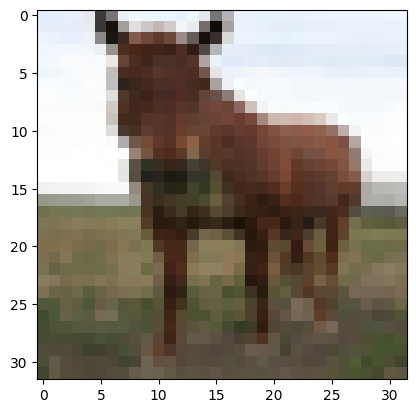

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2244])

In [6]:
y_train[2244]

array([7], dtype=uint8)

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [8]:
class_names[7]

'horse'

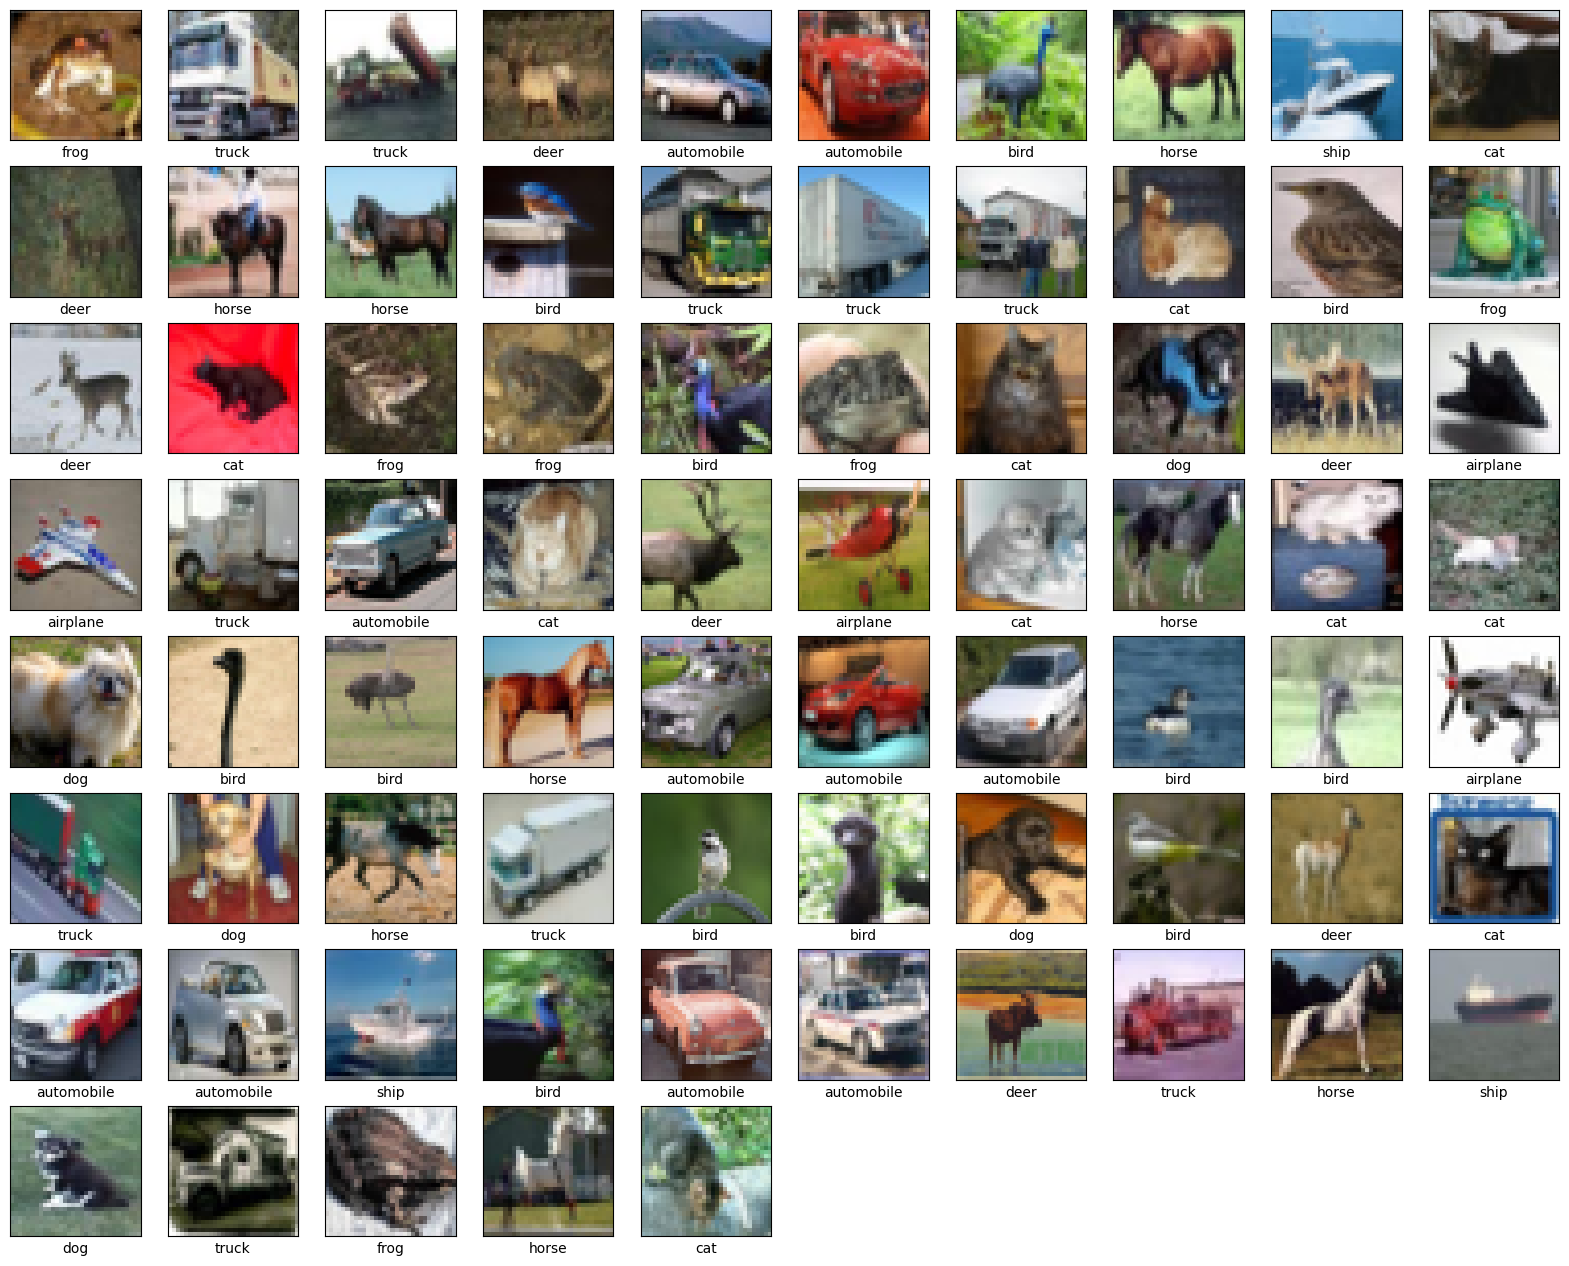

In [9]:
plt.figure(figsize=(20,20))
for i in range(75):
    plt.subplot(10,10,i+1)
    plt.imshow(x_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [10]:
x_train[2244][0]

array([[228, 237, 252],
       [229, 239, 252],
       [230, 240, 252],
       [231, 239, 251],
       [231, 233, 236],
       [ 61,  58,  58],
       [123, 116, 118],
       [237, 241, 247],
       [239, 248, 255],
       [235, 246, 255],
       [235, 246, 255],
       [234, 245, 255],
       [232, 242, 252],
       [240, 248, 255],
       [228, 232, 237],
       [116, 118, 118],
       [180, 180, 184],
       [235, 242, 249],
       [231, 242, 252],
       [230, 241, 251],
       [231, 241, 251],
       [232, 242, 252],
       [233, 242, 252],
       [234, 242, 253],
       [235, 244, 254],
       [236, 245, 254],
       [237, 246, 254],
       [238, 247, 255],
       [238, 246, 254],
       [238, 246, 254],
       [239, 247, 255],
       [240, 247, 254]], dtype=uint8)

In [3]:
x_train = x_train.astype('float')
x_test = x_test.astype('float')

# Normalize images
x_train = x_train/255
x_test = x_test/255

print(f'There are {x_train.shape[0]} training images')
print(f'There are {x_test.shape[0]} test images')

There are 50000 training images
There are 10000 test images


In [12]:
x_train[2244][0]

array([[0.89411765, 0.92941176, 0.98823529],
       [0.89803922, 0.9372549 , 0.98823529],
       [0.90196078, 0.94117647, 0.98823529],
       [0.90588235, 0.9372549 , 0.98431373],
       [0.90588235, 0.91372549, 0.9254902 ],
       [0.23921569, 0.22745098, 0.22745098],
       [0.48235294, 0.45490196, 0.4627451 ],
       [0.92941176, 0.94509804, 0.96862745],
       [0.9372549 , 0.97254902, 1.        ],
       [0.92156863, 0.96470588, 1.        ],
       [0.92156863, 0.96470588, 1.        ],
       [0.91764706, 0.96078431, 1.        ],
       [0.90980392, 0.94901961, 0.98823529],
       [0.94117647, 0.97254902, 1.        ],
       [0.89411765, 0.90980392, 0.92941176],
       [0.45490196, 0.4627451 , 0.4627451 ],
       [0.70588235, 0.70588235, 0.72156863],
       [0.92156863, 0.94901961, 0.97647059],
       [0.90588235, 0.94901961, 0.98823529],
       [0.90196078, 0.94509804, 0.98431373],
       [0.90588235, 0.94509804, 0.98431373],
       [0.90980392, 0.94901961, 0.98823529],
       [0.

In [136]:
#CNN Model with he_uniform instead of glorot_uniform as kernel_initializer
#Dropout layers added after each MaxPool2D layers to ensure the model drops features from time to time so that there's no overfitting
#and SGD optimizer with a learn_rate of 0.001 and momentum = 0.9
#70% on train , 72% on test
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))

# Output part of the model
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [ ]:
 from keras.optimizers import SGD
 from keras.api._v2.keras import metrics
 opt = SGD(learning_rate=0.001, momentum=0.9)
 model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [121]:
#CNN Model 1 with he_uniform instead of default glorot_uniform as kernel_initializer and a L2 kernel regularizer (70.39% accuracy on train, 72% on test)and SGD optimizer with a learn_rate of 0.001 and momentum = 0.9
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.regularizers import l2

model1 = Sequential()
model1.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001), padding='same'))
model1.add(MaxPool2D((2, 2)))
model1.add(Dropout(0.2))
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001), padding='same'))
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001), padding='same'))
model1.add(MaxPool2D((2, 2)))
model1.add(Dropout(0.2))
model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001), padding='same'))
model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001), padding='same'))
model1.add(MaxPool2D((2, 2)))
model1.add(Dropout(0.2))

# Output part of the model
model1.add(Flatten())
model1.add(Dense(128, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(0.001)))

model1.add(Dense(10, activation='softmax'))

In [ ]:
 from keras.optimizers import SGD
 from keras.api._v2.keras import metrics
 opt = SGD(learning_rate=0.001, momentum=0.9)
 model1.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [131]:
#CNN Model 2 with he_uniform instead of default glorot_uniform  as kernel_initializer (77.14% accuracy on train, 78.5% on test)and SGD optimizer with a learn_rate of 0.001 and momentum = 0.9
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


model2 = Sequential()
model2.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPool2D((2, 2)))
model2.add(Dropout(0.2))
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPool2D((2, 2)))
model2.add(Dropout(0.2))
model2.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPool2D((2, 2)))
model2.add(Dropout(0.2))

# Output part of the model
model2.add(Flatten())
model2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax'))

In [ ]:
 from keras.optimizers import SGD
 from keras.api._v2.keras import metrics
 opt = SGD(learning_rate=0.001, momentum=0.9)
 model2.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [142]:
#CNN Model 3 with he_uniform instead of default glorot_uniform  as kernel_initializer (78.25% accuracy on train, 76.47% on test)and Adam Optimizer
#Adam Optimizer resulted in less accuracy for test than train dataset when compared with the Stochastic Gradient Descent Optimizer -> Cause of concern?
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


model3 = Sequential()
model3.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model3.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(MaxPool2D((2, 2)))
model3.add(Dropout(0.2))
model3.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(MaxPool2D((2, 2)))
model3.add(Dropout(0.2))
model3.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(MaxPool2D((2, 2)))
model3.add(Dropout(0.2))

# Output part of the model
model3.add(Flatten())
model3.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model3.add(Dropout(0.2))
model3.add(Dense(10, activation='softmax'))

In [143]:
 from keras.optimizers import SGD
 from keras.api._v2.keras import metrics
 model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
#CNN Model 4 with a combination of he_normal and he_uniform kernel initializers in different convolution layers 
# (79.03% accuracy on train, 78.53% on test) with Adam Optimizer (Adam Optimizer performs really well compared with SGD with a combination of initializers)
# (67.35% accuracy on train, 68.91% on test) with SGD Optimizer 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


model4 = Sequential()
model4.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', input_shape=(32, 32, 3)))
model4.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(MaxPool2D((2, 2)))
model4.add(Dropout(0.2))
model4.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'))
model4.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(MaxPool2D((2, 2)))
model4.add(Dropout(0.2))
model4.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'))
model4.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(MaxPool2D((2, 2)))
model4.add(Dropout(0.2))

# Output part of the model
model4.add(Flatten())
model4.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model4.add(Dropout(0.2))
model4.add(Dense(10, activation='softmax'))

In [14]:
from keras.optimizers import SGD
from keras.api._v2.keras import metrics
opt = SGD(learning_rate=0.001, momentum=0.9)
model4.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
model4.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 20s 6ms/step - loss: 1.9083 - accuracy: 0.2852
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5800 - accuracy: 0.4167
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4338 - accuracy: 0.4767
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3191 - accuracy: 0.5222
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2267 - accuracy: 0.5585
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1465 - accuracy: 0.5901
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0777 - accuracy: 0.6173
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0214 - accuracy: 0.6380
Epoch 9/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9715 - accuracy: 0.6536
Epoch 10/10
1563/1563 [==============================] - 10s 6ms/step - lo

In [16]:
model4.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.8822 - accuracy: 0.6891


[0.8821601271629333, 0.6891000270843506]

In [37]:
#CNN Model 5 with a combination of he_normal and he_uniform kernel initializers in different convolution layers 
# (76.83% accuracy on train,75.82 % on test) with Adam Optimizer with 4 convolutional layers
# (73.96% accuracy on train,73.93 % on test) with Adam Optimizer with 4 convolutional layers and activity regularizer in dense function

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras import regularizers, initializers
from tensorflow.keras.regularizers import l2


model5 = Sequential()
model5.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', input_shape=(32, 32, 3)))
model5.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(MaxPool2D((2, 2)))
model5.add(Dropout(0.2))
model5.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', use_bias = True, bias_initializer=initializers.Zeros() ))
model5.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',  use_bias = True, bias_initializer=initializers.Zeros()))
model5.add(MaxPool2D((2, 2)))
model5.add(Dropout(0.2))
model5.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same',  use_bias = True, bias_initializer=initializers.Zeros()))
model5.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',  use_bias = True, bias_initializer=initializers.Zeros()))
model5.add(MaxPool2D((2, 2)))
model5.add(Dropout(0.2))
model5.add(Conv2D(200, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'))
model5.add(Conv2D(200, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(MaxPool2D((2, 2)))
model5.add(Dropout(0.2))

# Output part of the model
model5.add(Flatten())
model5.add(Dense(128, activation='relu', kernel_initializer='glorot_normal'))
model5.add(Dropout(0.2))
model5.add(Dense(10, activation='softmax'))

In [38]:
 from keras.api._v2.keras import metrics
 model5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [43]:
#CNN Model 6 with a combination of he_normal and he_uniform kernel initializers in different convolution layers; glorot_normal in Dense Layers
# (79.74% accuracy on train,77.24 % on test) with Adam Optimizer (# Added a zeros bias_initializer in the intermediate convolution layers )
# (79.68% accuracy on train, 78.39 % on test) with Adam Optimizer (Added a zeros bias_initializer in all convolution layers) 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras import regularizers, initializers
from tensorflow.keras.regularizers import l2

model6 = Sequential()
model6.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', use_bias = True, bias_initializer=initializers.Zeros(), input_shape=(32, 32, 3)))
model6.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', use_bias = True, bias_initializer=initializers.Zeros()))

model6.add(MaxPool2D((2, 2)))
model6.add(Dropout(0.2))
model6.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', use_bias = True, bias_initializer=initializers.Zeros() ))
model6.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',  use_bias = True, bias_initializer=initializers.Zeros()))
model6.add(MaxPool2D((2, 2)))
model6.add(Dropout(0.2))
model6.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same',  use_bias = True, bias_initializer=initializers.Zeros()))
model6.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',  use_bias = True, bias_initializer=initializers.Zeros()))
model6.add(MaxPool2D((2, 2)))
model6.add(Dropout(0.2))

# Output part of the model
model6.add(Flatten())
model6.add(Dense(128, activation='relu', kernel_initializer='glorot_normal'))
model6.add(Dropout(0.2))
model6.add(Dense(10, activation='softmax'))

In [44]:
 from keras.api._v2.keras import metrics
 model6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
#CNN Model 7 with a combination of he_normal and he_uniform kernel initializers in different convolution layers; glorot_normal in Dense Layers
# (80.2%  accuracy on train,77.24 % on test) with Adam Optimizer (# Added a zeros bias_initializer in the intermediate convolution layers )
# (76 % accuracy on train, 78.39 % on test) with Adam Optimizer (Added a zeros bias_initializer in all convolution layers) 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras import regularizers, initializers

model7 = Sequential()
model7.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model7.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model7.add(MaxPool2D((2, 2)))
model7.add(Dropout(0.2))
model7.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', use_bias = True, bias_initializer=initializers.Zeros() ))
model7.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',  use_bias = True, bias_initializer=initializers.Zeros()))
model7.add(MaxPool2D((2, 2)))
model7.add(Dropout(0.2))
model7.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',  use_bias = True, bias_initializer=initializers.Zeros()))
model7.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',  use_bias = True, bias_initializer=initializers.Zeros()))
model7.add(MaxPool2D((2, 2)))
model7.add(Dropout(0.2))

# Output part of the model
model7.add(Flatten())
model7.add(Dense(128, activation='relu', kernel_initializer='glorot_normal'))
model7.add(Dropout(0.2))
model7.add(Dense(10, activation='softmax'))

In [11]:
 from keras.api._v2.keras import metrics
 model7.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
model7.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10
  60/1563 [>.............................] - ETA: 6:06 - loss: 2.3033 - accuracy: 0.0953

KeyboardInterrupt: ignored

In [46]:
model6.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6420 - accuracy: 0.7839


[0.6420146822929382, 0.7839000225067139]

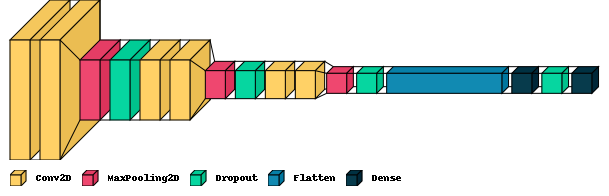

In [14]:
import visualkeras
from ann_visualizer.visualize import ann_viz
ann_viz(model7, view=True, filename="CNN-FinalModel", title="CNN Model with Four Convolution Layers")
from PIL import ImageFont
visualkeras.layered_view(model7, legend=True)

1/1 [==============================] - 0s 310ms/step
Model predicted class is dog and the actual number is 5 which corresponds to dog


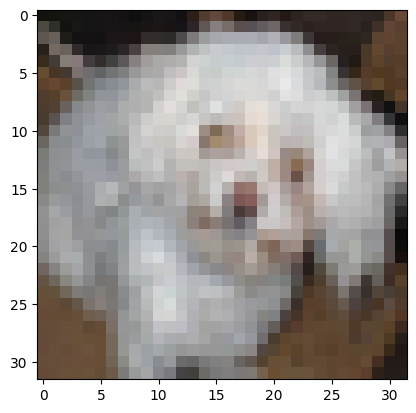

In [56]:
index_number = 1000
plt.imshow(x_test[index_number])
predicted_number = model.predict(x_test[index_number].reshape(1, 32, 32, 3))
predicted_number = predicted_number[0]
predicted_number = [round(i,0) for i in predicted_number]

array = np.array(predicted_number)
max_index = array.argmax()

print(f'Model predicted class is {class_names[max_index]} and the actual number is {y_test[index_number][0]} which corresponds to {class_names[y_test[index_number][0]]}')

# class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']